In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam




In [2]:
time_window = 5

In [3]:
df = pd.read_csv(r"CNNdata\fulldata.csv")
del df["DateTime"]
df


,Size,Price,MA_w5,MA_w10,MA_w15,Direction,MA5_Order_Direction,MA10_Order_Direction,MA15_Order_Direction,Ask_Price_Level_1,...,RS,Delta_AP_1,Delta_BP_1,WAP,Returns,vol_w5,vol_w10,vol_w15,Mid_Change,Next_Mid_Direction
0,118.355556,307.321080,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,308.044556,...,0.002592,0.000000,0.000000,307.445075,0.000000,0.000000,0.000000,0.000000,-0.323646,0.0
1,69.687500,307.216365,0.000000,0.000000,0.000000,-1.0,0.0,0.0,0.0,307.660625,...,0.002202,-0.383931,-0.263361,307.372174,-0.001053,0.000000,0.000000,0.000000,0.080353,2.0
2,80.229508,307.313770,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,307.797705,...,0.002571,0.137080,0.023627,307.155783,0.000261,0.000000,0.000000,0.000000,0.033459,2.0
3,78.866667,307.158053,0.000000,0.000000,0.000000,-1.0,0.0,0.0,0.0,307.848000,...,0.002680,0.050295,0.016623,307.435423,0.000109,0.000000,0.000000,0.000000,0.807830,2.0
4,252.936170,307.881592,0.000388,0.000000,0.000000,1.0,1.0,0.0,0.0,308.619574,...,0.002438,0.771574,0.844085,308.354882,0.002624,0.001353,0.000000,0.000000,0.658846,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,98.947368,300.344732,0.000025,0.000016,0.000011,1.0,5.0,2.0,1.0,300.370000,...,0.000033,0.028125,0.038125,300.361371,0.000110,0.000048,0.000047,0.000040,-0.000353,0.0
9783,99.341176,300.356176,0.000023,0.000007,0.000009,1.0,5.0,2.0,3.0,300.370000,...,0.000036,0.000000,-0.000706,300.360659,-0.000001,0.000049,0.000038,0.000040,-0.025332,0.0
9784,115.753425,300.345616,0.000006,-0.000002,0.000005,-1.0,3.0,2.0,3.0,300.349178,...,0.000066,-0.020822,-0.029842,300.334172,-0.000084,0.000069,0.000048,0.000046,-0.015525,0.0
9785,99.548387,300.322177,-0.000005,-0.000006,0.000002,1.0,3.0,4.0,3.0,300.329032,...,0.000035,-0.020146,-0.010904,300.322364,-0.000052,0.000074,0.000051,0.000048,0.029038,2.0


In [4]:
print(df.dtypes)
print(df.isnull().sum().cumsum())


Size                  float64
Price                 float64
MA_w5                 float64
MA_w10                float64
MA_w15                float64
                       ...   
vol_w5                float64
vol_w10               float64
vol_w15               float64
Mid_Change            float64
Next_Mid_Direction    float64
Length: 66, dtype: object
Size                  0
Price                 0
MA_w5                 0
MA_w10                0
MA_w15                0
                     ..
vol_w5                0
vol_w10               0
vol_w15               0
Mid_Change            0
Next_Mid_Direction    0
Length: 66, dtype: int64


In [5]:
for index in df:
    print(index,df[index].isna().sum())

Size 0
Price 0
MA_w5 0
MA_w10 0
MA_w15 0
Direction 0
MA5_Order_Direction 0
MA10_Order_Direction 0
MA15_Order_Direction 0
Ask_Price_Level_1 0
Ask_Volume_Level_1 0
Bid_Price_Level_1 0
Bid_Volume_Level_1 0
Ask_Price_Level_2 0
Ask_Volume_Level_2 0
Bid_Price_Level_2 0
Bid_Volume_Level_2 0
Ask_Price_Level_3 0
Ask_Volume_Level_3 0
Bid_Price_Level_3 0
Bid_Volume_Level_3 0
Ask_Price_Level_4 0
Ask_Volume_Level_4 0
Bid_Price_Level_4 0
Bid_Volume_Level_4 0
Ask_Price_Level_5 0
Ask_Volume_Level_5 0
Bid_Price_Level_5 0
Bid_Volume_Level_5 0
Ask_Price_Level_6 0
Ask_Volume_Level_6 0
Bid_Price_Level_6 0
Bid_Volume_Level_6 0
Ask_Price_Level_7 0
Ask_Volume_Level_7 0
Bid_Price_Level_7 0
Bid_Volume_Level_7 0
Ask_Price_Level_8 0
Ask_Volume_Level_8 0
Bid_Price_Level_8 0
Bid_Volume_Level_8 0
Ask_Price_Level_9 0
Ask_Volume_Level_9 0
Bid_Price_Level_9 0
Bid_Volume_Level_9 0
Ask_Price_Level_10 0
Ask_Volume_Level_10 0
Bid_Price_Level_10 0
Bid_Volume_Level_10 0
Mid 0
Spread 0
Ask_Volume 0
Bid_Volume 0
Ask_Volume_l5 

(array([1.15010780e-02, 1.68092679e-01, 2.92923611e+00, 5.39842910e+00,
        1.38897635e-01, 1.06163797e-02, 0.00000000e+00, 0.00000000e+00,
        8.84698312e-04, 8.84698312e-04]),
 array([-3.47099018e-01, -2.31606137e-01, -1.16113257e-01, -6.20376432e-04,
         1.14872504e-01,  2.30365385e-01,  3.45858265e-01,  4.61351146e-01,
         5.76844026e-01,  6.92336907e-01,  8.07829787e-01]),
 <BarContainer object of 10 artists>)

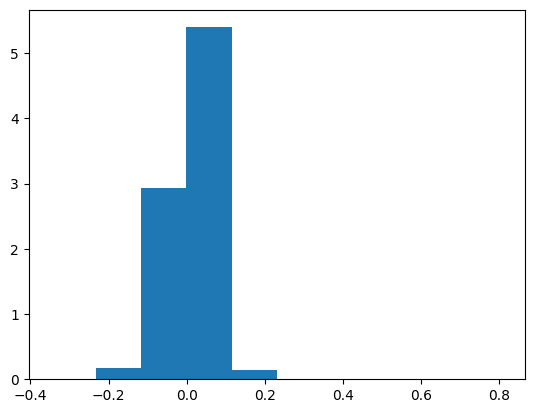

In [6]:
#plt.hist(df["Next_Mid_Direction"],density=True)
plt.hist(df["Mid_Change"],density=True)

In [7]:

X = df.drop(["Next_Mid_Direction","Mid_Change"], axis=1)
y = df["Next_Mid_Direction"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)
df["Size"] = df["Size"].astype(np.float64)

numerical_cols = X_train.select_dtypes(include=np.float64).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])





In [8]:
def create_image_data(X,time_window):
    num_samples = len(X) - time_window + 1
    num_channels = X.shape[1]
    images = np.zeros((num_samples,num_channels,time_window))
    for i in range(num_samples):
        images[i] = X[i:i+time_window].T
    return images

def create_model(input_shape):
    model = keras.Sequential([
        keras.Input(shape=input_shape),  

        layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),  
        layers.BatchNormalization(), 
        layers.MaxPooling1D(pool_size=2),  

        layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'), 
        layers.BatchNormalization(), 
        layers.MaxPooling1D(pool_size=2),  

        layers.Flatten(),  
        layers.Dense(128, activation='relu'),  
        layers.Dropout(0.5),  
        layers.Dense(3,activation="softmax")  
    ])
    return model




In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=False)  # Split training data further

X_train_images = create_image_data(X_train, time_window)
y_train_images = y_train.iloc[time_window - 1:len(y_train)].values

X_val_images = create_image_data(X_val,time_window)
y_val_images = y_val.iloc[time_window -1:len(y_train)].values

X_test_images = create_image_data(X_test, time_window)
y_test_images = y_test.iloc[time_window - 1:len(y_test)].values 



In [10]:
X_train

,Size,Price,MA_w5,MA_w10,MA_w15,Direction,MA5_Order_Direction,MA10_Order_Direction,MA15_Order_Direction,Ask_Price_Level_1,...,Bid_Volume_l5,OBI,RS,Delta_AP_1,Delta_BP_1,WAP,Returns,vol_w5,vol_w10,vol_w15
0,118.355556,307.321080,0.000000,0.000000,0.000000e+00,1.0,0.0,0.0,0.0,308.044556,...,450.966667,122.392692,0.002592,0.000000,0.000000,307.445075,0.000000,0.000000,0.000000,0.000000
1,69.687500,307.216365,0.000000,0.000000,0.000000e+00,-1.0,0.0,0.0,0.0,307.660625,...,395.835938,213.933224,0.002202,-0.383931,-0.263361,307.372174,-0.001053,0.000000,0.000000,0.000000
2,80.229508,307.313770,0.000000,0.000000,0.000000e+00,1.0,0.0,0.0,0.0,307.797705,...,321.590164,86.335319,0.002571,0.137080,0.023627,307.155783,0.000261,0.000000,0.000000,0.000000
3,78.866667,307.158053,0.000000,0.000000,0.000000e+00,-1.0,0.0,0.0,0.0,307.848000,...,706.266667,427.099299,0.002680,0.050295,0.016623,307.435423,0.000109,0.000000,0.000000,0.000000
4,252.936170,307.881592,0.000388,0.000000,0.000000e+00,1.0,1.0,0.0,0.0,308.619574,...,2181.914894,631.711606,0.002438,0.771574,0.844085,308.354882,0.002624,0.001353,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258,62.857143,302.842857,0.000072,0.000038,2.531402e-05,1.0,3.0,1.0,-2.0,302.980000,...,315.714286,99.909091,0.000396,0.013636,-0.010227,302.969091,0.000006,0.000095,0.000073,0.000061
6259,60.789474,302.781579,0.000040,0.000026,1.755285e-05,1.0,3.0,3.0,0.0,302.980000,...,330.105263,104.122969,0.000629,0.000000,-0.070526,302.963318,-0.000116,0.000128,0.000087,0.000071
6260,68.272727,302.830000,-0.000056,0.000002,4.717732e-07,1.0,5.0,5.0,0.0,302.980000,...,442.818182,248.870467,0.001123,0.000000,-0.149474,302.966868,-0.000247,0.000127,0.000123,0.000099
6261,66.500000,302.878571,-0.000033,0.000013,8.963205e-06,0.0,4.0,5.0,1.0,302.980000,...,537.928571,229.529687,0.000887,0.000000,0.071429,302.968790,0.000118,0.000149,0.000129,0.000103


In [11]:


input_shape = (X_train_images.shape[1], X_train_images.shape[2])
model = create_model(input_shape)
learning_rate = 0.0001  
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

batch_size = 5
epochs = 150

history = model.fit(X_train_images, y_train_images, epochs=epochs, 
                batch_size=batch_size, validation_data=(X_val_images, y_val_images), verbose=1)




Epoch 1/150
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3505 - loss: 1.5191 - val_accuracy: 0.3835 - val_loss: 1.5322
Epoch 2/150
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3798 - loss: 1.1065 - val_accuracy: 0.3284 - val_loss: 1.5683
Epoch 3/150
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3872 - loss: 1.0801 - val_accuracy: 0.3329 - val_loss: 2.1384
Epoch 4/150
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4071 - loss: 1.0698 - val_accuracy: 0.3617 - val_loss: 1.5749
Epoch 5/150
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4227 - loss: 1.0534 - val_accuracy: 0.3848 - val_loss: 1.5092
Epoch 6/150
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4156 - loss: 1.0604 - val_accuracy: 0.3720 - val_loss: 1.9944
Epoch 7/150
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4176 - loss: 1.0525 - val_accuracy: 0.3707 - val_loss: 1.9540
Epoch 8/150
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4330 - loss: 1

In [12]:
print(len(y_train[y_train==2])/len(y_train))
print(len(y_train[y_train==0])/len(y_train))
print(len(y_train[y_train==1])/len(y_train))


0.3720261855340891
0.3828836021076162
0.24509021235829476


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Test Accuracy (using predictions): 0.38945752302968273
              precision    recall  f1-score   support

         0.0       0.38      0.30      0.34       729
         1.0       0.39      0.39      0.39       523
         2.0       0.39      0.48      0.43       702

    accuracy                           0.39      1954
   macro avg       0.39      0.39      0.39      1954
weighted avg       0.39      0.39      0.39      1954

[[220 175 334]
 [132 202 189]
 [226 137 339]]
Test Accuracy (using model.evaluate): 0.3894575238227844


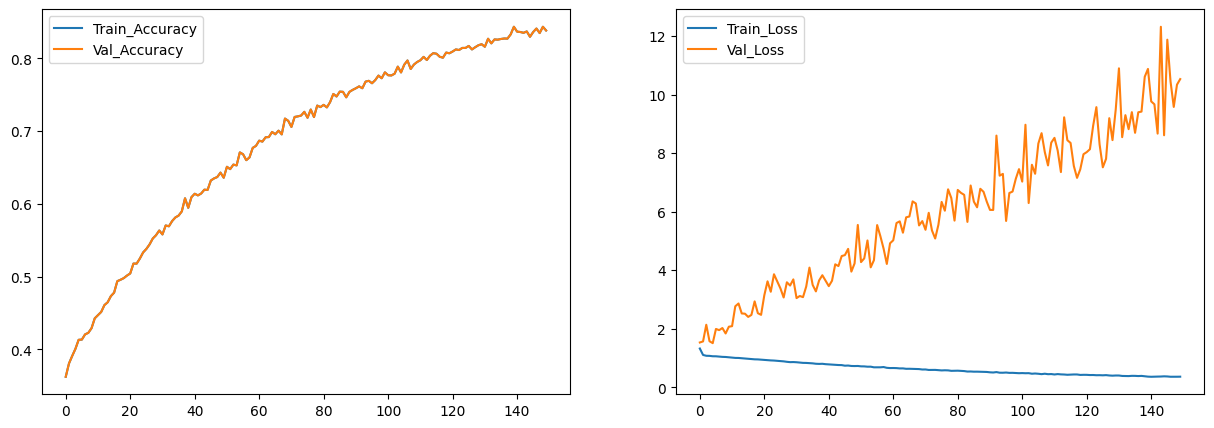

In [13]:
predictions = model.predict(X_test_images)
predicted_labels = np.argmax(predictions, axis=1) 
accuracy = accuracy_score(y_test_images, predicted_labels)
print(f"Test Accuracy (using predictions): {accuracy}")

print(classification_report(y_test_images,predicted_labels))

print(confusion_matrix(y_test_images,predicted_labels))

loss, accuracy_eval = model.evaluate(X_test_images, y_test_images, verbose=0)
print(f"Test Accuracy (using model.evaluate): {accuracy_eval}")

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history.history["accuracy"],label="Train_Accuracy")
ax[0].plot(history.history["accuracy"],label="Val_Accuracy")
ax[1].plot(history.history["loss"],label="Train_Loss")
ax[1].plot(history.history["val_loss"],label="Val_Loss")
ax[0].legend()
ax[1].legend()
